## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.
C:\Users\Skyno\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Skyno\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Skyno\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Skyno\Anaco

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout

"""
建立神經網路，並加入 dropout layer
"""
def build_mlp(input_shape, drp_ratio, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [14]:
def build_mlp2(input_shape, drp_ratio, output_units=10, num_neurons=[512, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [18]:
def build_mlp3(input_shape, drp_ratio, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
#LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.2, 0.3, 0.4 ,0.5]

In [26]:
results = {}

for dropout_rate in Dropout_EXP:
    keras.backend.clear_session()
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=dropout_rate)
    optimizer = keras.optimizers.Adam()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "droprate-%s" % str(dropout_rate)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 57us/step - loss: 2.0432 - acc: 0.2425 - val_loss: 1.8204 - val_acc: 0.3444
Epoch 2/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.8532 - acc: 0.3301 - val_loss: 1.7679 - val_acc: 0.3716
Epoch 3/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.7888 - acc: 0.3563 - val_loss: 1.6694 - val_acc: 0.4068
Epoch 4/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.7289 - acc: 0.3789 - val_loss: 1.6460 - val_acc: 0.4111
Epoch 5/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.7034 - acc: 0.3872 - val_loss: 1.6246 - val_acc: 0.4331
Epoch 6/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.6698 - acc: 0.3993 - val_loss: 1.5742 - val_acc: 0.4431
Epoch 7/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.6484 - acc: 0.4080 - val_loss: 1.5736 - val_acc

Epoch 10/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.7322 - acc: 0.3718 - val_loss: 1.6770 - val_acc: 0.4189
Epoch 11/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.7189 - acc: 0.3787 - val_loss: 1.6708 - val_acc: 0.4187
Epoch 12/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.7070 - acc: 0.3832 - val_loss: 1.6295 - val_acc: 0.4394
Epoch 13/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.6988 - acc: 0.3876 - val_loss: 1.6317 - val_acc: 0.4225
Epoch 14/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.6959 - acc: 0.3865 - val_loss: 1.6279 - val_acc: 0.4395
Epoch 15/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.6871 - acc: 0.3910 - val_loss: 1.6343 - val_acc: 0.4263
Epoch 16/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.6833 - acc: 0.3919 - val_loss: 1.6055 - val_acc: 0.4459
Epoch 17/50
50000/50000 [=========

50000/50000 [==============================] - 2s 46us/step - loss: 1.8365 - acc: 0.3201 - val_loss: 1.8133 - val_acc: 0.3605
Epoch 20/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.8341 - acc: 0.3211 - val_loss: 1.8264 - val_acc: 0.3564
Epoch 21/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.8270 - acc: 0.3245 - val_loss: 1.8024 - val_acc: 0.3674
Epoch 22/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.8208 - acc: 0.3267 - val_loss: 1.8015 - val_acc: 0.3616
Epoch 23/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.8315 - acc: 0.3241 - val_loss: 1.8108 - val_acc: 0.3592
Epoch 24/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.8183 - acc: 0.3294 - val_loss: 1.7861 - val_acc: 0.3737
Epoch 25/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.8178 - acc: 0.3296 - val_loss: 1.8286 - val_acc: 0.3534
Epoch 26/50
50000/50000 [=====================

50000/50000 [==============================] - 2s 48us/step - loss: 1.9369 - acc: 0.2673 - val_loss: 1.9765 - val_acc: 0.2737
Epoch 29/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.9358 - acc: 0.2647 - val_loss: 1.9337 - val_acc: 0.2913
Epoch 30/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.9324 - acc: 0.2698 - val_loss: 1.9489 - val_acc: 0.2766
Epoch 31/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.9336 - acc: 0.2701 - val_loss: 1.9521 - val_acc: 0.2978
Epoch 32/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.9316 - acc: 0.2695 - val_loss: 1.9566 - val_acc: 0.2924
Epoch 33/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.9253 - acc: 0.2715 - val_loss: 1.9369 - val_acc: 0.2959
Epoch 34/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.9260 - acc: 0.2715 - val_loss: 1.9691 - val_acc: 0.2838
Epoch 35/50
50000/50000 [=====================

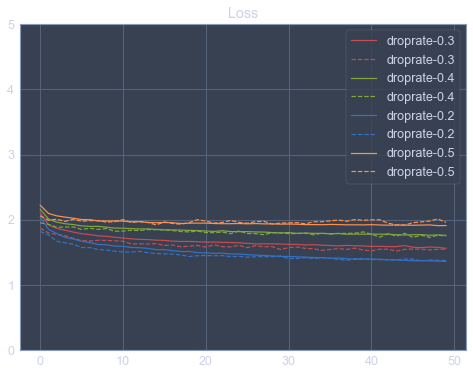

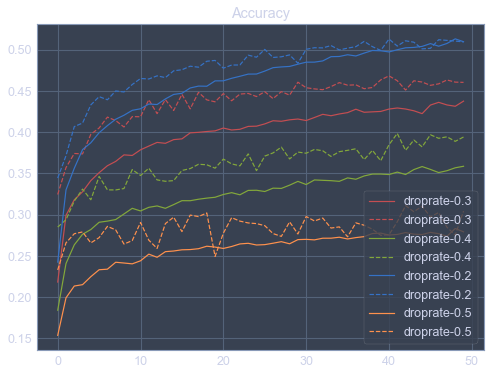

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

fig = plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()
fig.savefig("3hidden_loss.png", bbox_inches='tight', dpi=300)

fig = plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()
fig.savefig("3hidden_acc.png", bbox_inches='tight', dpi=300)


In [28]:
results2 = {}

for dropout_rate in Dropout_EXP:
    keras.backend.clear_session()
    model = build_mlp2(input_shape=x_train.shape[1:], drp_ratio=dropout_rate)
    optimizer = keras.optimizers.Adam()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "droprate-%s" % str(dropout_rate)
    results2[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 58us/step - loss: 2.1916 - acc: 0.1627 - val_loss: 1.9964 - val_acc: 0.2524
Epoch 2/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.9863 - acc: 0.2574 - val_loss: 1.8814 - val_acc: 0.3210
Epoch 3/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.9189 - acc: 0.2908 - val_loss: 1.7973 - val_acc: 0.3570
Epoch 4/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.8662 - acc: 0.3189 - val_loss: 1.7442 - val_acc: 0.3655
Epoch 5/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.8340 - acc: 0.3337 - val_loss: 1.7236 - val_acc: 0.3776
Epoch 6/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.8056 - acc: 0.3435 - val_loss: 1.7003 - val_acc: 0.3965
Epoch 7/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.7766 - acc: 0.3579 - val_loss: 1.6852 - val_acc

Epoch 10/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.9038 - acc: 0.2857 - val_loss: 1.8213 - val_acc: 0.3280
Epoch 11/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.8877 - acc: 0.2892 - val_loss: 1.8542 - val_acc: 0.3144
Epoch 12/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.8918 - acc: 0.2898 - val_loss: 1.8723 - val_acc: 0.3169
Epoch 13/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.8785 - acc: 0.2977 - val_loss: 1.8307 - val_acc: 0.3219
Epoch 14/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.8710 - acc: 0.3010 - val_loss: 1.7988 - val_acc: 0.3459
Epoch 15/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.8653 - acc: 0.3047 - val_loss: 1.8065 - val_acc: 0.3340
Epoch 16/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.8554 - acc: 0.3068 - val_loss: 1.7910 - val_acc: 0.3442
Epoch 17/50
50000/50000 [=========

50000/50000 [==============================] - 2s 49us/step - loss: 2.0505 - acc: 0.2096 - val_loss: 2.1021 - val_acc: 0.1976
Epoch 20/50
50000/50000 [==============================] - 2s 49us/step - loss: 2.0460 - acc: 0.2096 - val_loss: 2.0808 - val_acc: 0.2017
Epoch 21/50
50000/50000 [==============================] - 3s 50us/step - loss: 2.0469 - acc: 0.2108 - val_loss: 2.0252 - val_acc: 0.2156
Epoch 22/50
50000/50000 [==============================] - 3s 51us/step - loss: 2.0412 - acc: 0.2118 - val_loss: 2.0170 - val_acc: 0.2312
Epoch 23/50
50000/50000 [==============================] - 2s 49us/step - loss: 2.0430 - acc: 0.2119 - val_loss: 2.0688 - val_acc: 0.2045
Epoch 24/50
50000/50000 [==============================] - 2s 50us/step - loss: 2.0368 - acc: 0.2148 - val_loss: 2.1480 - val_acc: 0.1668
Epoch 25/50
50000/50000 [==============================] - 3s 52us/step - loss: 2.0317 - acc: 0.2166 - val_loss: 2.0848 - val_acc: 0.1988
Epoch 26/50
50000/50000 [=====================

50000/50000 [==============================] - 2s 49us/step - loss: 2.1264 - acc: 0.1694 - val_loss: 2.2232 - val_acc: 0.1381
Epoch 29/50
50000/50000 [==============================] - 2s 49us/step - loss: 2.1247 - acc: 0.1675 - val_loss: 2.2147 - val_acc: 0.1366
Epoch 30/50
50000/50000 [==============================] - 2s 49us/step - loss: 2.1289 - acc: 0.1697 - val_loss: 2.1935 - val_acc: 0.1444
Epoch 31/50
50000/50000 [==============================] - 2s 50us/step - loss: 2.1269 - acc: 0.1669 - val_loss: 2.1921 - val_acc: 0.1484
Epoch 32/50
50000/50000 [==============================] - 2s 49us/step - loss: 2.1256 - acc: 0.1686 - val_loss: 2.2224 - val_acc: 0.1361
Epoch 33/50
50000/50000 [==============================] - 3s 51us/step - loss: 2.1252 - acc: 0.1702 - val_loss: 2.2221 - val_acc: 0.1434
Epoch 34/50
50000/50000 [==============================] - 2s 49us/step - loss: 2.1238 - acc: 0.1688 - val_loss: 2.2310 - val_acc: 0.1242
Epoch 35/50
50000/50000 [=====================

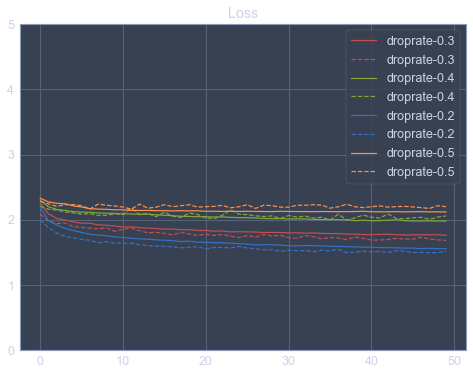

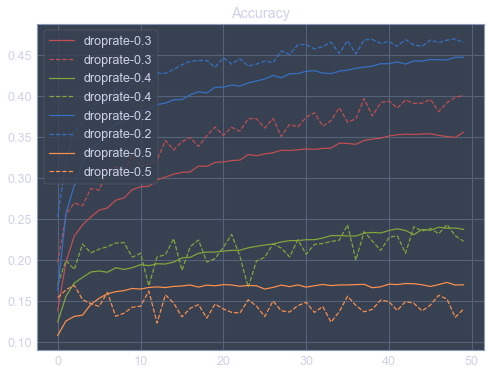

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

fig = plt.figure(figsize=(8,6))
for i, cond in enumerate(results2.keys()):
    plt.plot(range(len(results2[cond]['train-loss'])),results2[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results2[cond]['valid-loss'])),results2[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()
fig.savefig("5hidden_loss.png", bbox_inches='tight', dpi=300)

fig = plt.figure(figsize=(8,6))
for i, cond in enumerate(results2.keys()):
    plt.plot(range(len(results2[cond]['train-acc'])),results2[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results2[cond]['valid-acc'])),results2[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()
fig.savefig("5hidden_acc.png", bbox_inches='tight', dpi=300)

In [19]:
model = build_mlp3(input_shape=x_train.shape[1:], drp_ratio=Dropout_EXP)
model.summary()
optimizer = keras.optimizers.Adam()
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.9

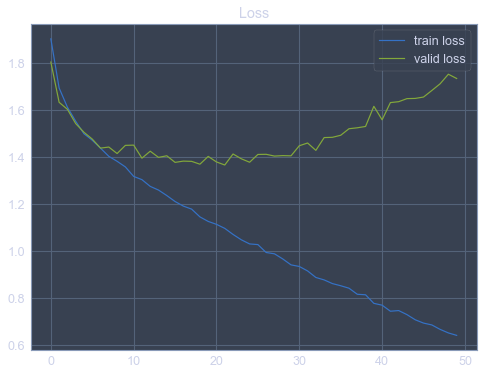

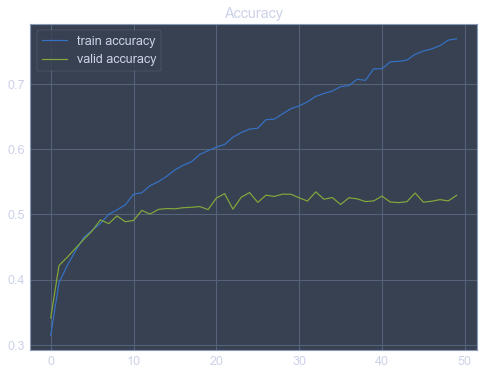

In [24]:
%matplotlib inline

fig = plt.figure(figsize=(8,6))
plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()
fig.savefig("3hidden_loss_n.png", bbox_inches='tight', dpi=300)

fig = plt.figure(figsize=(8,6))
plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()
fig.savefig("3hidden_acc_n.png", bbox_inches='tight', dpi=300)
